In [12]:
import csv
import pandas as pd
%matplotlib inline 
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
df_blue=pd.read_csv('LOL_blue_Baron_Dragon_Herald_Inhibs_Tower_gold_blue.csv')

In [17]:
df_red=pd.read_csv('LOL_red_Baron_Dragon_Herald_Inhibs_Tower_gold_kill.csv')

In [33]:
df_blue.head(2)

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill
0,0,0,40,blue,TSM,0,1,1,0,0,2,9,11361,29519.0,12
1,1,1,38,blue,CST,1,0,3,1,0,0,7,11419,27282.0,11


In [34]:
df_red.head(2)

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill
0,0,0,40,red,C9,3802,0,1,1,0,0,4,11986,28097,1
1,1,1,38,red,DIG,3803,1,3,0,0,1,7,11661,26177,16


In [35]:
pd_LOL=df_blue.append(df_red, ignore_index=True)
pd_LOL

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill
0,0,0,40,blue,TSM,0,1,1,0,0,2,9,11361,29519.0,12
1,1,1,38,blue,CST,1,0,3,1,0,0,7,11419,27282.0,11
2,2,2,40,blue,WFX,2,1,4,1,0,4,15,12374,31317.0,16
3,3,3,41,blue,TIP,3,0,0,1,0,0,4,12033,25772.0,18
4,4,4,35,blue,CLG,4,1,2,1,0,1,8,11943,27472.0,6
5,5,5,24,blue,DIG,5,0,0,0,0,0,0,11606,26493.0,18
6,6,6,39,blue,CST,6,1,3,1,0,2,10,12795,29047.0,12
7,7,7,43,blue,TL,7,1,3,2,0,3,11,11667,27486.0,12
8,8,8,41,blue,C9,8,0,0,1,0,0,6,12921,29127.0,10
9,9,9,32,blue,T8,9,1,1,1,0,3,11,12316,28028.0,3


In [36]:
pd_LOL['intercept']=1.0
pd_LOL.head(2)

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill,intercept
0,0,0,40,blue,TSM,0,1,1,0,0,2,9,11361,29519.0,12,1.0
1,1,1,38,blue,CST,1,0,3,1,0,0,7,11419,27282.0,11,1.0


In [40]:
pd_LOL.apply(lambda x: sum(x.isnull()),axis=0) 

Unnamed: 0       0
MatchID          0
gamelength       0
TeamColor        0
TeamTag          0
TeamID           0
Result           0
DragonValue      0
BaronValue       0
Herald           0
InhibitsValue    0
TowerValue       0
GoldIn10         0
GoldIn20         0
kill             0
intercept        0
dtype: int64

In [38]:
pd_LOL.dropna(inplace=True)

In [41]:
pred=['gamelength','DragonValue','GoldIn10','GoldIn20','Herald','BaronValue','InhibitsValue','TowerValue','kill']
pd_LOL[pred]
logistic_model =sm.Logit(pd_LOL['Result'], pd_LOL[pred]).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.099067
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                 7602
Model:                          Logit   Df Residuals:                     7593
Method:                           MLE   Df Model:                            8
Date:                Mon, 20 Nov 2017   Pseudo R-squ.:                  0.8571
Time:                        01:55:19   Log-Likelihood:                -753.10
converged:                       True   LL-Null:                       -5269.3
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
gamelength       -0.1703      0.010    -17.691      0.000      -0.189      -0.151
DragonValue       0.0594      0.054      1.103      0.270      -0.046       0.165
GoldIn10         -0.0003   6.49e-05     -4.448      0.000      -0.000      -0.000
GoldIn20      -6.053e-05   2.71e-05     -2.235      0.025      -0.000   -7.44e-06
Herald           -0.1321      0.084     -1.568      0.117      -0.297       0.033
BaronValue        0.2153      0.094      2.300      0.021       0.032       0.399
InhibitsValue    -0.2859      0.074     -3.878      0.000      -0.430      -0.141
TowerValue        1.8170      0.064     28.447      0.000       1.692       1.942
kill              0.0003      0.010      0.033      0.974      -0.020       0.020
=================================================================================
"""

Here we see, To win a game,gold in 10, gold in 20 is important, and also the BaronValue, the InhibitsValue, and the Towervalue.
For every unit change in Baron, the log odds of being a winner will decrease by 0.2153
For every unit change in Tower I knocked down, the log odds of being a winner will decrease by 1.8170

               gamelength  DragonValue  GoldIn10  GoldIn20    Herald  \
gamelength       1.000000     0.305647 -0.079356 -0.071771 -0.061553   
DragonValue      0.305647     1.000000 -0.034298 -0.047210  0.030612   
GoldIn10        -0.079356    -0.034298  1.000000  0.300327  0.345102   
GoldIn20        -0.071771    -0.047210  0.300327  1.000000  0.128356   
Herald          -0.061553     0.030612  0.345102  0.128356  1.000000   
BaronValue       0.352034     0.085425  0.140017 -0.015488  0.062995   
InhibitsValue    0.207398     0.062870  0.195907 -0.008231  0.137476   
TowerValue       0.184947     0.048893  0.268181 -0.022401  0.189825   
kill            -0.006995     0.002410 -0.008983  0.008080  0.017499   

               BaronValue  InhibitsValue  TowerValue      kill  
gamelength       0.352034       0.207398    0.184947 -0.006995  
DragonValue      0.085425       0.062870    0.048893  0.002410  
GoldIn10         0.140017       0.195907    0.268181 -0.008983  
GoldIn20        -0.

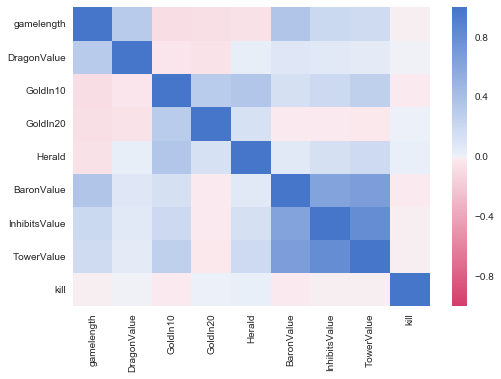

In [43]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations =pd_LOL[['gamelength','DragonValue','GoldIn10','GoldIn20','Herald','BaronValue','InhibitsValue','TowerValue','kill']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

 Here we see the Baron value,Inhibts value and Tower Value have some relationship with each other.